# Logistic Regression Notebook
-------
We will use Social_Network_Ads.csv dataset in this notebook.

The dataset has information on customers, and whether they bought a certain product or not.

In this notebook, we will first implement Logistic Rregression from scratch, then use sklearn [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

We will show how to easily normalize you data using sklearn, and calculate the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## 1. Read Data & Clean it

In [4]:
df = pd.read_csv('Data/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

## 2. Split Data
----
Notice that we want X to be only the Age and Estimated Salary columns

In [6]:
X = df.loc[:, 'Age':'EstimatedSalary']
Y = df['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(300, 2) (300,)
(100, 2) (100,)


### Additional Part!
-----
It's better to standardize/normalize your data before giving it to any regression model.

What normalize does can be shown in this image:

![title](images/standardize.png)

We can use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function from sklearn right away.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_test[0:5]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ]])

## 3. Model Building

## Part One: From scratch
In the first part of the notebook, we will implement Linear Regression **from scratch**.

In [10]:
X1_train = X_train[:, 0]
X2_train = X_train[:, 1]
print(X1_train.shape, X2_train.shape)

(300,) (300,)


In [11]:
w0, w1, w2 = 0, 0, 0
lr = 0.0001
epochs = 1000
n = float(len(X_train))

logistic function is:
y = sigmoid_function(w0 + w1 * x1 + w2 * x2)

In [12]:
# Z = h_theta(x)
# output range [0,1]
sigmoid_func = lambda z: 1.0 / (1 + np.exp(-z))

In [13]:
##########################
#### IGNORE THIS CELL ####
##########################
def cost_funct(X, y, Theta):
    hypothesis = sigmoid(X * omega)
    zero = np.multiply(y, np.log2(hypothesis))
    one = np.multiply((1 - y), np.log2(1 - hypothesis))
    return (-1/len(X)) * np.sum(zero + one)

In [14]:
for i in range(epochs):
    # Ypred = w0 + w1 * X1 + w2 * X2
    # so, Y_pred is in range [0,1]
    Y_pred = sigmoid_func(w0 + w1 * X1_train + w2 * X2_train)
    
    Dw0 = 1/n * np.sum((Y_pred - Y_train))
    Dw1 = 1/n * np.sum(X1_train * (Y_pred - Y_train))
    Dw2 = 1/n * np.sum(X2_train * (Y_pred - Y_train))
    
    w0 = w0 - lr * Dw0
    w1 = w1 - lr * Dw1
    w2 = w2 - lr * Dw2

In [15]:
# this function just to map probability to either 0 or 1. rint rounds a float value to the closest integer
classify_func = lambda x: np.rint(x)

In [23]:
X1_test = X_test[:, 0]
X2_test = X_test[:, 1]
print(Y_pred[0:5])
# calculate Y_pred probability based on X_test now, not X_train
Y_pred_prob = sigmoid_func(w0 + w1 * X1_test + w2 * X2_test)
Y_pred = classify_func(Y_pred_prob)
Y_pred[0:5]

[0. 0. 0. 1. 1.]


array([0., 0., 0., 0., 0.])

## 4. Evaluate Model (Confusion Matrix)
----
After getting the confusion matrix, we will calculate accuracy, recall, precision and f1 score as following:

![title](images/confusion_matrix.png)

In [25]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[66  2]
 [ 8 24]]


In [27]:
# (66 + 24) / 100
accuracy = float(cm[0,0] + cm[1,1]) / (len(Y_pred))
print("Accuracy = %.2f%%" % (accuracy * 100))

recall = float(cm[0,0]) / (cm[0,0] + cm[0,1])
print("Recall = %.2f%%" % (recall * 100))

precision = cm[0,0] * 1.0 / (cm[0,0] + cm[1,0])
print("Precision = %.2f%%" % (precision * 100))

f1 = (2 * precision * recall) / (precision + recall)
print("F1 Score = %.2f%%" % (f1 * 100))

Accuracy = 90.00%
Recall = 97.06%
Precision = 89.19%
F1 Score = 92.96%


## Part Two: Using Sklearn

Notice that Y is categorial; contains values of 0 and 1. Hence, it needn't be normalized.

Now, back to the model..

In [28]:
logistic_model = LogisticRegression(random_state=0)
logistic_model = logistic_model.fit(X_train, Y_train)
Y_pred = logistic_model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [29]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[65  3]
 [ 8 24]]


This means that 65+24 elements were predicted correctly, and 8+3 are predicted wrong.

In [30]:
accuracy = (cm[0,0] + cm[1,1]) * 1.0 / (len(Y_pred))
print("Accuracy = %.2f%%" % (accuracy * 100))

recall = cm[0,0] * 1.0 / (cm[0,0] + cm[0,1])
print("Recall = %.2f%%" % (recall * 100))

precision = cm[0,0] * 1.0 / (cm[0,0] + cm[1,0])
print("Precision = %.2f%%" % (precision * 100))

f1 = (2 * precision * recall) / (precision + recall)
print("F1 Score = %.2f%%" % (f1 * 100))

Accuracy = 89.00%
Recall = 95.59%
Precision = 89.04%
F1 Score = 92.20%


## 5. (EXTRA) Visualize the logistic function

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


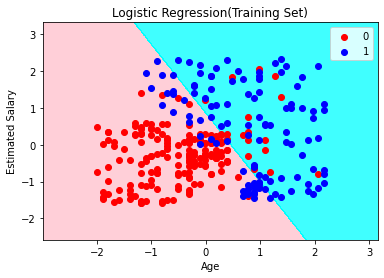

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set= X_train, Y_train

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, logistic_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('red','blue'))(i) ,label= j)

plt.title('Logistic Regression(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


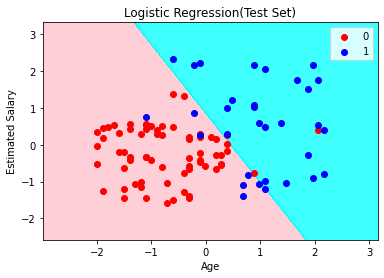

In [32]:
X_set, y_set= X_test, Y_test

X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

plt.contourf(X1,X2, logistic_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('pink','cyan')))

plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))

for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j) 

plt.title('Logistic Regression(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()